# Pregunta 1:
## ¿Cómo influye el nivel educativo de los padres en el desarrollo de competencias críticas independientemente del estrato socioeconómico?

### Importación y caracterización inicial de las variables

In [27]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns
df = pd.read_csv("df_limpio.csv", usecols=["FAMI_EDUCACIONMADRE", "FAMI_EDUCACIONPADRE", "PUNT_GLOBAL", "PUNT_MATEMATICAS","FAMI_ESTRATOVIVIENDA","FAMI_EDU_PADRES_SUM" ] )
df.head()

,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,PUNT_MATEMATICAS,PUNT_GLOBAL,FAMI_EDU_PADRES_SUM
0,1.0,1.0,Estrato 1,26.0,196.0,2.0
1,4.0,3.0,Estrato 1,60.0,258.0,7.0
2,7.0,5.0,Estrato 2,61.0,285.0,12.0
3,5.0,5.0,Estrato 2,54.0,302.0,10.0
4,7.0,0.0,Estrato 2,45.0,241.0,7.0


In [20]:
df.shape

(470818, 6)

In [24]:
df.isna().sum()
df.notna().sum(axis=0)/df.shape[0]*100

FAMI_EDUCACIONMADRE      97.727572
FAMI_EDUCACIONPADRE      97.716103
FAMI_ESTRATOVIVIENDA     97.534291
PUNT_MATEMATICAS        100.000000
PUNT_GLOBAL              63.501608
FAMI_EDU_PADRES_SUM      97.630932
dtype: float64

### Subpregunta1 : ¿Que relación existe entre educación de los padres y competencias?

<Axes: xlabel='FAMI_EDU_PADRES_SUM', ylabel='PUNT_GLOBAL'>

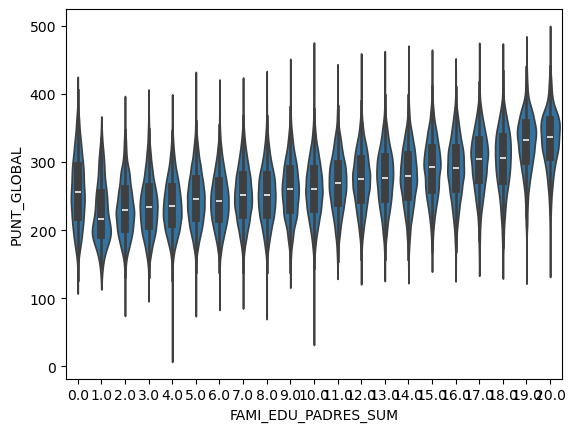

In [35]:
sns.violinplot(
    data=df,
    x="FAMI_EDU_PADRES_SUM",
    y="PUNT_GLOBAL",
    
    inner="box"
)

In [39]:
df["EDU_PADRES_CAT"] = pd.cut(
    df["FAMI_EDU_PADRES_SUM"],
    bins=[-1, 6, 12, 20],
    labels=["Baja", "Media", "Alta"]
)

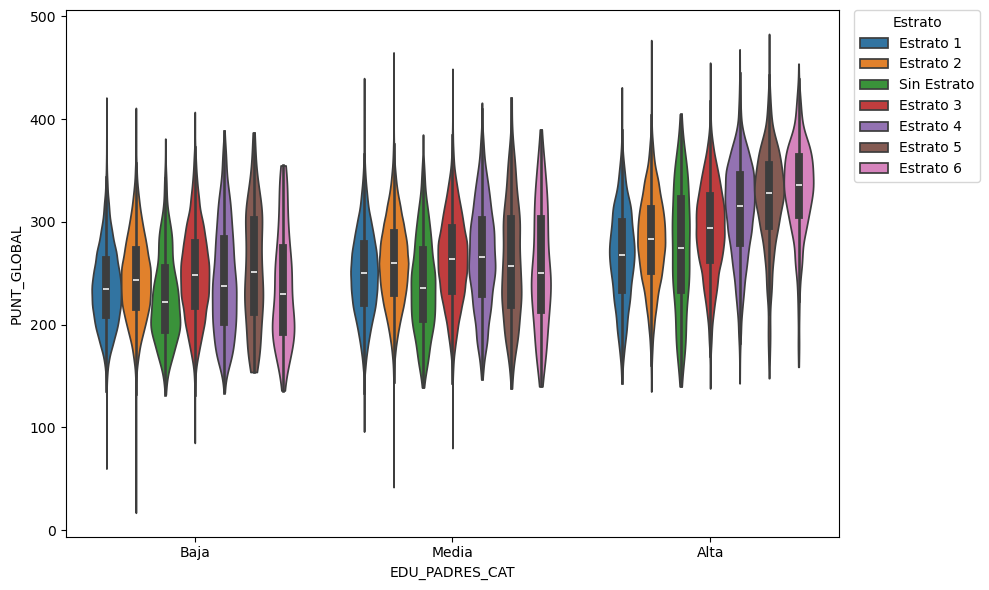

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))

sns.violinplot(
    data=df,
    x="EDU_PADRES_CAT",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    inner="box",
    cut=0,
    ax=ax
)

ax.legend(
    title="Estrato",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()

### Mapa de Calor

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Asegura orden en el eje Y
df["EDU_PADRES_CAT"] = pd.Categorical(
    df["EDU_PADRES_CAT"],
    categories=["Baja", "Media", "Alta"],
    ordered=True
)

# (Opcional) ordenar estratos
orden_estrato = ["Sin Estrato", "Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]
df["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(
    df["FAMI_ESTRATOVIVIENDA"],
    categories=orden_estrato,
    ordered=True
)

In [48]:
tabla_media = (
    df
    .pivot_table(
        index="EDU_PADRES_CAT",
        columns="FAMI_ESTRATOVIVIENDA",
        values="PUNT_GLOBAL",
        aggfunc="mean"
    )
)

/var/folders/20/k_nwfbln0fsb18fc01zwwkl80000gn/T/ipykernel_83376/4176710291.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


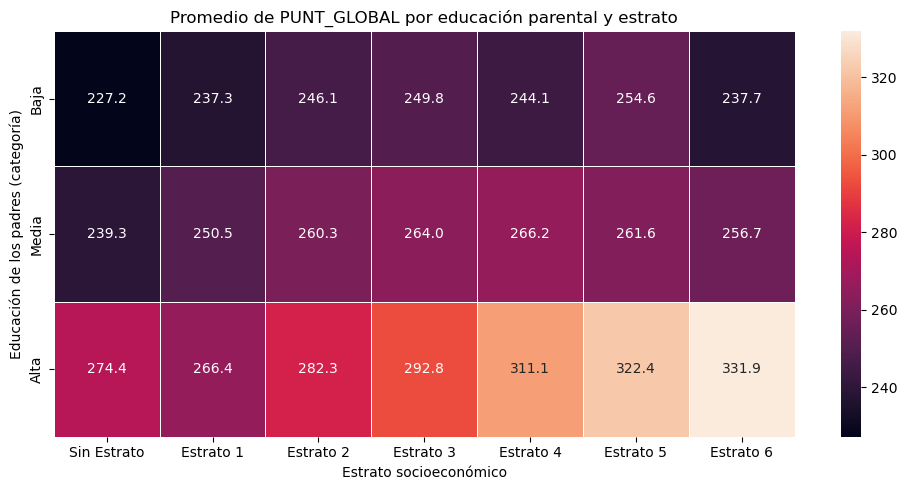

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    tabla_media,
    annot=True,        # muestra el número en cada celda
    fmt=".1f",         # 1 decimal
    linewidths=0.5,
    ax=ax
)

ax.set_title("Promedio de PUNT_GLOBAL por educación parental y estrato")
ax.set_xlabel("Estrato socioeconómico")
ax.set_ylabel("Educación de los padres (categoría)")

plt.tight_layout()
plt.show()

In [50]:
tabla_n = (
    df_plot
    .pivot_table(
        index="EDU_PADRES_CAT",
        columns="FAMI_ESTRATOVIVIENDA",
        values="PUNT_GLOBAL",
        aggfunc="size"
    )
)

/var/folders/20/k_nwfbln0fsb18fc01zwwkl80000gn/T/ipykernel_83376/248253014.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(


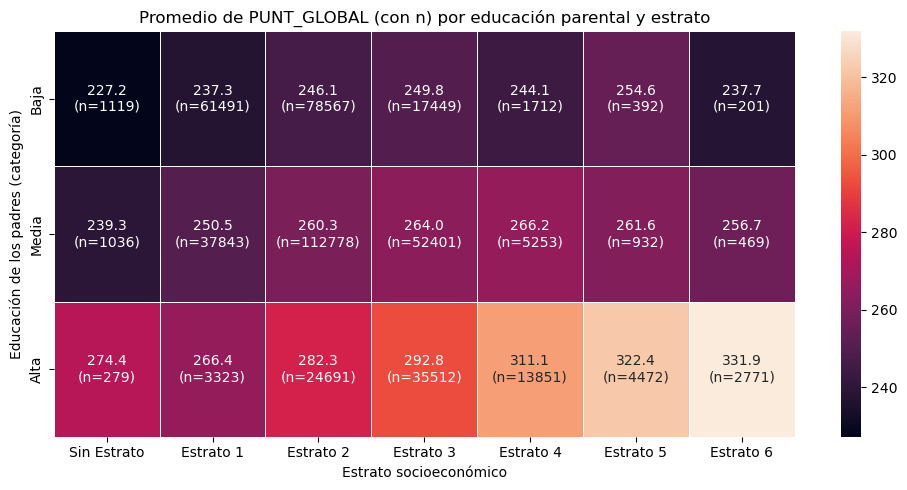

In [51]:
labels = tabla_media.round(1).astype(str) + "\n(n=" + tabla_n.fillna(0).astype(int).astype(str) + ")"

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    tabla_media,
    annot=labels,
    fmt="",
    linewidths=0.5,
    ax=ax
)

ax.set_title("Promedio de PUNT_GLOBAL (con n) por educación parental y estrato")
ax.set_xlabel("Estrato socioeconómico")
ax.set_ylabel("Educación de los padres (categoría)")

plt.tight_layout()
plt.show()

###

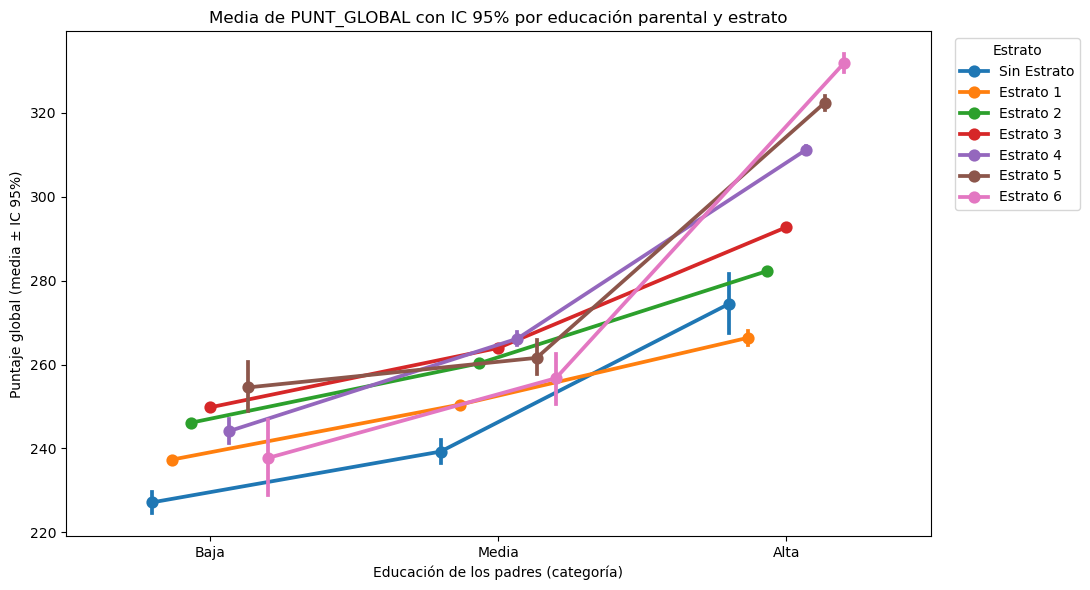

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar orden de categorías
df_plot["EDU_PADRES_CAT"] = pd.Categorical(
    df_plot["EDU_PADRES_CAT"],
    categories=["Baja", "Media", "Alta"],
    ordered=True
)

orden_estrato = ["Sin Estrato", "Estrato 1", "Estrato 2", "Estrato 3", "Estrato 4", "Estrato 5", "Estrato 6"]
df_plot["FAMI_ESTRATOVIVIENDA"] = pd.Categorical(
    df_plot["FAMI_ESTRATOVIVIENDA"],
    categories=orden_estrato,
    ordered=True
)

fig, ax = plt.subplots(figsize=(11, 6))

sns.pointplot(
    data=df_plot,
    x="EDU_PADRES_CAT",
    y="PUNT_GLOBAL",
    hue="FAMI_ESTRATOVIVIENDA",
    estimator="mean",
    errorbar=("ci", 95),   # IC 95%
    n_boot=1000,           # bootstrap
    dodge=0.4,
    markers="o",
    linestyles="-",
    ax=ax
)

ax.set_title("Media de PUNT_GLOBAL con IC 95% por educación parental y estrato")
ax.set_xlabel("Educación de los padres (categoría)")
ax.set_ylabel("Puntaje global (media ± IC 95%)")

ax.legend(title="Estrato", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [55]:
import statsmodels.formula.api as smf

# modelo base
modelo1 = smf.ols(
    "PUNT_GLOBAL ~ FAMI_EDU_PADRES_SUM + C(FAMI_ESTRATOVIVIENDA)",
    data=df_plot
).fit()

print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     9677.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:27:17   Log-Likelihood:            -1.4954e+06
No. Observations:              289779   AIC:                         2.991e+06
Df Residuals:                  289771   BIC:                         2.991e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
